<a href="https://colab.research.google.com/github/gstripling00/introduction_to_neural_networks/blob/Notebooks/LIL_Simple_Neural_Network_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**bold text**# Prediction Model for Sales Analysis 



## Introduction 
I created a prediction model for sales analysis. In this model, we need to feed the advertising budget of TV, radio, and newspapers to the model and the model will forecast the possible sales. For designing the model, the machine learning method I opted for is simple linear regression, and the programming was done in Jupyter notebook.

## Dataset
The advertising dataset captures the sales revenue generated with respect to advertisement costs across numerous platforms like radio, TV, and newspapers.

### Features:

#### Digital: advertising dollars spent on Internet.
#### TV: advertising dollars spent on TV.
#### Radio: advertising dollars spent on Radio.
#### Newspaper: advertising dollars spent on Newspaper.

### Target (Label):
#### Sales budget

### Import Libraries

In [2]:
# Importing Pandas, a data processing and CSV file I/O libraries
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Seaborn is a Python data visualization library based on matplotlib. 
%matplotlib inline   
import sklearn

##Import the libraries
#import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense

###  Load the Dataset

You will use the [USA housing prices](https://www.kaggle.com/kanths028/usa-housing) dataset found on Kaggle.  The data contains the following columns:

* 'Avg. Area Income': Avg. Income of residents of the city house is located in.
* 'Avg. Area House Age': Avg Age of Houses in same city
* 'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city
* 'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city
* 'Area Population': Population of city house is located in
* 'Price': Price that the house sold at
* 'Address': Address for the house

In [8]:
# Next, you read the dataset into a Pandas dataframe.

url = 'https://github.com/gstripling00/introduction_to_neural_networks/blob/Datasets/Advertising_2023.csv?raw=true'
advertising_df= pd.read_csv(url,index_col=0)

In [9]:
advertising_df.head()

,digital,TV,radio,newspaper,sales
1,345.15,230.1,37.8,69.2,22.1
2,66.75,44.5,39.3,45.1,10.4
3,25.80,17.2,45.9,69.3,9.3
4,227.25,151.5,41.3,58.5,18.5
5,271.20,180.8,10.8,58.4,12.9


In [10]:
# Pandas info() function is used to get a concise summary of the dataframe.
advertising_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 1 to 600
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   digital    600 non-null    float64
 1   TV         600 non-null    float64
 2   radio      600 non-null    float64
 3   newspaper  600 non-null    float64
 4   sales      600 non-null    float64
dtypes: float64(5)
memory usage: 28.1 KB


In [11]:
'''====== Data Exploration and Preprocessing ======'''

#shape of dataframe - 600 rows, five columns
advertising_df.shape

(600, 5)

Let's check for any null values.

In [16]:
# The isnull() method is used to check and manage NULL values in a data frame.
advertising_df.isnull().sum()

digital      0
TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [17]:
#check there are any NAN values
advertising_df.isnull().values.any()

False

In [18]:
'''=== show the statistics analysis of each attributes ==='''

#descriptive statistics 
advertising_df.describe()

,digital,TV,radio,newspaper,sales
count,600.000000,600.000000,600.000000,600.000000,600.000000
mean,220.563750,147.042500,23.264000,30.554000,14.022500
std,128.566181,85.710787,14.822002,21.742232,5.208739
min,1.050000,0.700000,0.000000,0.300000,1.600000
25%,111.562500,74.375000,9.975000,12.750000,10.375000
50%,224.625000,149.750000,22.900000,25.750000,12.900000
75%,328.237500,218.825000,36.525000,45.100000,17.400000
max,444.600000,296.400000,49.600000,114.000000,27.000000


## Exploratory Data Analysis (EDA)

Let's create some simple plots to check out the data!  

<Axes: >

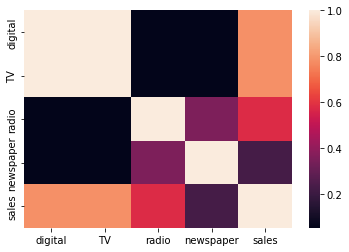

In [19]:
# The heatmap is a way of representing the data in a 2-dimensional form. The data values are represented as colors in the graph.
# The goal of the heatmap is to provide a colored visual summary of information.
sns.heatmap(advertising_df.corr()) 

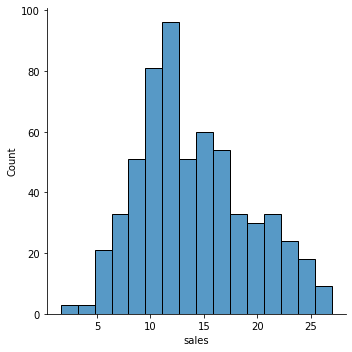

In [20]:
# It is used basically for univariant set of observations and visualizes it through a histogram i.e. only one observation
# and hence you choose one particular column of the dataset.
sns.displot(advertising_df['sales'])

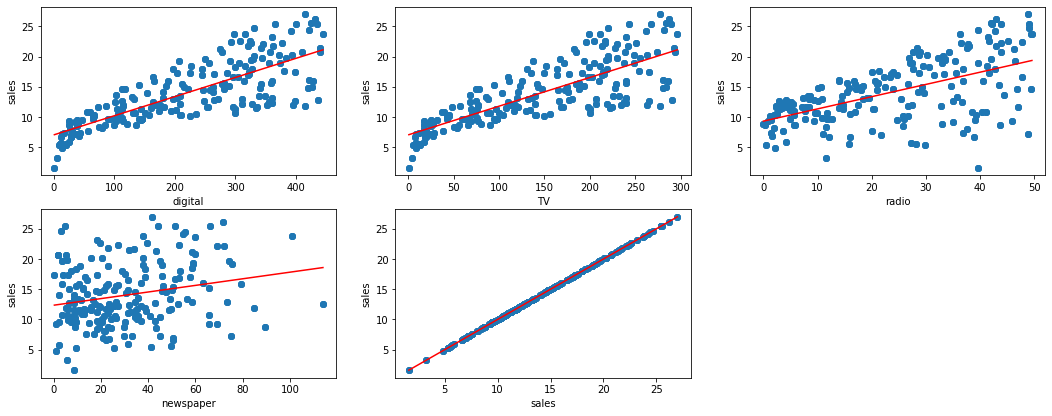

In [21]:
'''=== Show the linear relationship between features  and price. Thus, it provides that how the scattered 
      they are and which features has more impact in prediction of house price. ==='''

# visiualize all variables  with price(MEDV)
from scipy import stats
#creates figure
plt.figure(figsize=(18, 18))

for i, col in enumerate(advertising_df.columns[0:13]): #iterates over all columns except for price column (last one)
    plt.subplot(5, 3, i+1) # each row three figure
    x = advertising_df[col] #x-axis
    y = advertising_df['sales'] #y-axis
    plt.plot(x, y, 'o')
    
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1)) (np.unique(x)), color='red')
    plt.xlabel(col) # x-label
    plt.ylabel('sales') # y-label
    

## Training a Linear Regression Model

Regression is a supervised machine learning process.  It is similar to classification, but rather than predicting a label, you try to predict a continuous value.   Linear regression defines the relationship between a target variable (y) and a set of predictive features (x).  Simply stated, If you need to predict a number, then use regression. 

Let's now begin to train your regression model! You will need to first split up your data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. You will toss out the Address column because it only has text info that the linear regression model can't use.

### X (features) and y (target) arrays

Next, let's define the features and label.  Briefly, feature is input; label is output. This applies to both classification and regression problems.

In [23]:
X = advertising_df[['digital', 'TV', 'radio', 'newspaper']]
y = advertising_df['sales']

## Train - Test - Split

Now let's split the data into a training set and a testing set. You will train out model on the training set and then use the test set to evaluate the model.  Note that you are using 40% of the data for testing.  

#### What is Random State? 
If an integer for random state is not specified in the code, then every time the code is executed, a new random value is generated and the train and test datasets will have different values each time.  However, if a fixed value is assigned -- like random_state = 0 or 1 or 101 or any other integer, then no matter how many times you execute your code the result would be the same, e.g. the same values will be in the train and test datasets.  Thus, the random state that you provide is used as a seed to the random number generator. This ensures that the random numbers are generated in the same order. 

In [24]:
# Import train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Split up the data into a training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [25]:
## Build the model
model = Sequential()
model.add(Dense(4,activation='relu')) 
model.add(Dense(3,activation='relu'))
model.add(Dense(1))

In [29]:
## Compile the Model
## Compilation - Before training a model, you need to configure the learning process, which is done via the compile method. It receives three arguments

# for a mean squared error regression problem

model.compile(loss= "mean_squared_error" , 
              optimizer="adam", 
              metrics=["mean_squared_error"])

#model.summary()

In [30]:
## SIMPLE:  Fit the Model
# train the model, iterating on the data in batches
# of 32 samples
model.fit(X_train, y_train, epochs=32)

Epoch 1/32
12/12 [==============================] - 1s 3ms/step - loss: 41878.7656 - mean_squared_error: 41878.7656
Epoch 2/32
12/12 [==============================] - 0s 2ms/step - loss: 35430.5430 - mean_squared_error: 35430.5430
Epoch 3/32
12/12 [==============================] - 0s 2ms/step - loss: 29987.4355 - mean_squared_error: 29987.4355
Epoch 4/32
12/12 [==============================] - 0s 3ms/step - loss: 25297.4395 - mean_squared_error: 25297.4395
Epoch 5/32
12/12 [==============================] - 0s 2ms/step - loss: 21529.0508 - mean_squared_error: 21529.0508
Epoch 6/32
12/12 [==============================] - 0s 2ms/step - loss: 18426.6797 - mean_squared_error: 18426.6797
Epoch 7/32
12/12 [==============================] - 0s 2ms/step - loss: 15897.4648 - mean_squared_error: 15897.4648
Epoch 8/32
12/12 [==============================] - 0s 2ms/step - loss: 13701.6279 - mean_squared_error: 13701.6279
Epoch 9/32
12/12 [==============================] - 0s 2ms/step - loss: 

In [32]:
history = model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    epochs = 150
)

Epoch 1/150
12/12 [==============================] - 0s 27ms/step - loss: 1192.8728 - mean_squared_error: 1192.8728 - val_loss: 1129.7104 - val_mean_squared_error: 1129.7104
Epoch 2/150
12/12 [==============================] - 0s 7ms/step - loss: 1112.1844 - mean_squared_error: 1112.1844 - val_loss: 1052.6677 - val_mean_squared_error: 1052.6677
Epoch 3/150
12/12 [==============================] - 0s 6ms/step - loss: 1036.2671 - mean_squared_error: 1036.2671 - val_loss: 983.0281 - val_mean_squared_error: 983.0281
Epoch 4/150
12/12 [==============================] - 0s 6ms/step - loss: 967.5154 - mean_squared_error: 967.5154 - val_loss: 919.1849 - val_mean_squared_error: 919.1849
Epoch 5/150
12/12 [==============================] - 0s 7ms/step - loss: 904.2274 - mean_squared_error: 904.2274 - val_loss: 860.1757 - val_mean_squared_error: 860.1757
Epoch 6/150
12/12 [==============================] - 0s 7ms/step - loss: 847.6497 - mean_squared_error: 847.6497 - val_loss: 806.1716 - val_mean

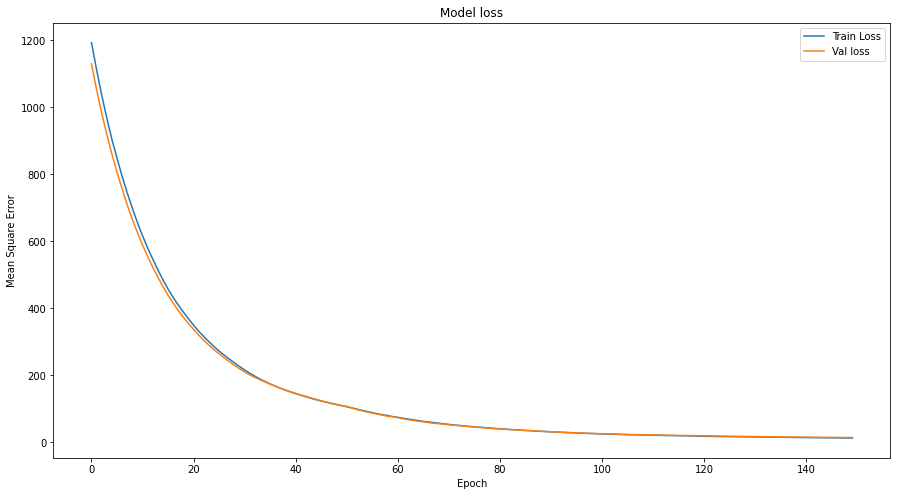

In [33]:
# show the graph of model loss in trainig and validation 

plt.figure(figsize=(15,8))
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')
plt.plot(history.epoch, history.history['loss'],
           label='Train Loss')
plt.plot(history.epoch, history.history['val_loss'],
           label = 'Val loss')
plt.title('Model loss')
plt.legend()

## TALK ABOUT CONVERGENCE


In [ ]:
#Note that after 32 Epochs we could have "stopped early" rather than go ghrough 150 eochs since the
#numbers are so close MSE is around $163K.

In [61]:
## Build the model
model = Sequential()
model.add(Dense(32, input_dim=4, activation= "relu"))
model.add(Dense(32, activation= "relu"))
model.add(Dense(1, activation='linear', name='sales'))


## Compile the Model
model.compile(loss= "mse" , 
              optimizer="adam", 
              metrics=["mse"])


## Fit the Model
history = model.fit(X_train, y_train,
          batch_size=32, epochs=100,
          validation_data = (X_test, y_test))


Epoch 1/100
12/12 [==============================] - 2s 32ms/step - loss: 257.6584 - mse: 257.6584 - val_loss: 92.9133 - val_mse: 92.9133
Epoch 2/100
12/12 [==============================] - 0s 13ms/step - loss: 60.4959 - mse: 60.4959 - val_loss: 10.5323 - val_mse: 10.5323
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 16.7678 - mse: 16.7678 - val_loss: 11.4169 - val_mse: 11.4169
Epoch 4/100
12/12 [==============================] - 0s 6ms/step - loss: 8.4839 - mse: 8.4839 - val_loss: 8.5762 - val_mse: 8.5762
Epoch 5/100
12/12 [==============================] - 0s 7ms/step - loss: 6.9638 - mse: 6.9638 - val_loss: 5.6381 - val_mse: 5.6381
Epoch 6/100
12/12 [==============================] - 0s 8ms/step - loss: 4.8157 - mse: 4.8157 - val_loss: 4.4850 - val_mse: 4.4850
Epoch 7/100
12/12 [==============================] - 0s 6ms/step - loss: 3.9393 - mse: 3.9393 - val_loss: 4.1782 - val_mse: 4.1782
Epoch 8/100
12/12 [==============================] - 0s 5ms/step - 

In [63]:
#Let's show loss as Mean Square Error (MSE)
loss, mse = model.evaluate(X_train)

print("Mean Squared Error", mse)

12/12 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - mse: 0.0000e+00
Mean Squared Error 0.0


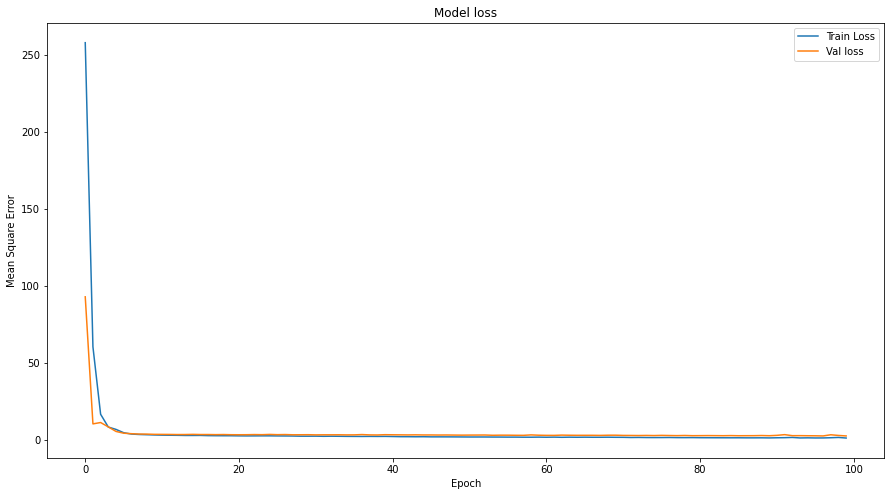

In [64]:
# show the graph of model loss in trainig and validation 

plt.figure(figsize=(15,8))
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')
plt.plot(history.epoch, history.history['loss'],
           label='Train Loss')
plt.plot(history.epoch, history.history['val_loss'],
           label = 'Val loss')
plt.title('Model loss')
plt.legend()

## TALK ABOUT CONVERGENCE


In [66]:
# Use matplotlib to draw the model's loss curves for training and validation
def plot_curves(history, metrics):
    nrows = 1
    ncols = 2
    fig = plt.figure(figsize=(10, 5))

    for idx, key in enumerate(metrics):  
        ax = fig.add_subplot(nrows, ncols, idx+1)
        plt.plot(history.history[key])
        plt.plot(history.history['val_{}'.format(key)])
        plt.title('model {}'.format(key))
        plt.ylabel(key)
        plt.xlabel('epoch')
        plt.legend(['train', 'validation'], loc='upper left');  


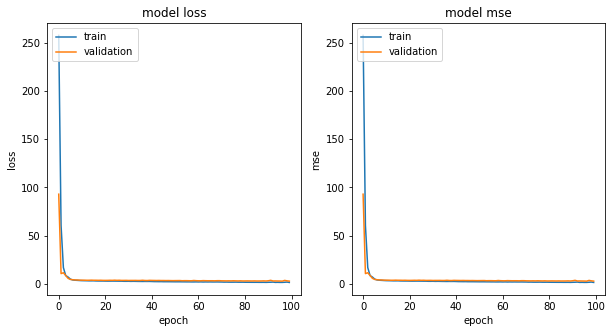

In [67]:
plot_curves(history, ['loss', 'mse'])

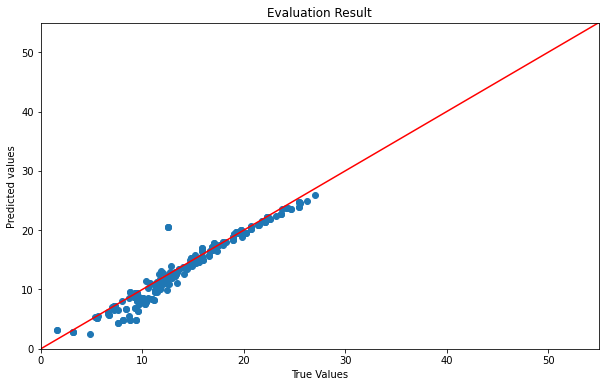

In [68]:
'''=== Visualize the model evaluation skill ==='''


# visualize the prediction uisng diagonal line
y = test_predictions #y-axis
x = y_test #x-axis
fig, ax = plt.subplots(figsize=(10,6)) # create figure
ax.scatter(x,y) #scatter plots for x,y
ax.set(xlim=(0,55), ylim=(0, 55)) #set limit
ax.plot(ax.get_xlim(), ax.get_ylim(), color ='red') # draw 45 degree diagonal in figure
plt.xlabel('True Values')
plt.ylabel('Predicted values')
plt.title('Evaluation Result')
plt.show()

In [69]:
#check the model performace in test dataset
score = model.evaluate(X_test, y_test, verbose=1)
print('loss value: ', score[0])
print('Mean absolute error: ', score[1])


8/8 [==============================] - 0s 3ms/step - loss: 2.7231 - mse: 2.7231
loss value:  2.7230706214904785
Mean absolute error:  2.7230706214904785


In [70]:
'''=== predict the house price ==='''

# predict house price using the test data 
test_predictions = model.predict(X_test).flatten()
print(test_predictions)


8/8 [==============================] - 0s 2ms/step
[16.162144  20.889862  17.068348   9.355356  10.387813  13.303375
 10.006567  12.68465   12.281933  10.894365   8.221563  15.688934
 22.77667    7.0543737 16.18763   23.468468  23.911903  22.77667
 15.612095  26.572826  14.846441  11.334549  11.271816   7.7347856
 15.296593  19.326927  19.70158   10.133791  15.56493   24.69651
 15.210399  14.349319   7.710481  12.989916  21.509962   8.941726
 15.965275   9.082462   5.0832887 23.969208  25.063477   7.7475743
  6.1281457 20.06674    7.0536456 19.150011   2.3180323 10.816845
 25.160004  22.366802  12.68465   15.086807  13.321719   5.49966
 15.56493    9.355356  10.4301815 17.616638   9.264477  24.48395
 16.32272    8.473941  17.647652  22.80146    9.773467   8.221563
 21.777473  11.95537   18.392391  17.95203   12.126272  17.085495
 13.401993  17.510643   5.7770333 12.7384205 15.622597   2.2675884
 17.251675  22.744469  13.369343  22.274803  23.3214     7.710481
  6.7579713 11.95537    6.

In [71]:
# show the true value and predicted value in dataframe
true_predicted = pd.DataFrame(list(zip(y_test, test_predictions)), 
                    columns=['True Value','Predicted Value'])
true_predicted.head(10)

,True Value,Predicted Value
0,16.6,16.162144
1,20.7,20.889862
2,17.4,17.068348
3,9.5,9.355356
4,12.4,10.387813
5,13.2,13.303375
6,11.5,10.006567
7,12.3,12.684650
8,12.9,12.281933
9,10.9,10.894365


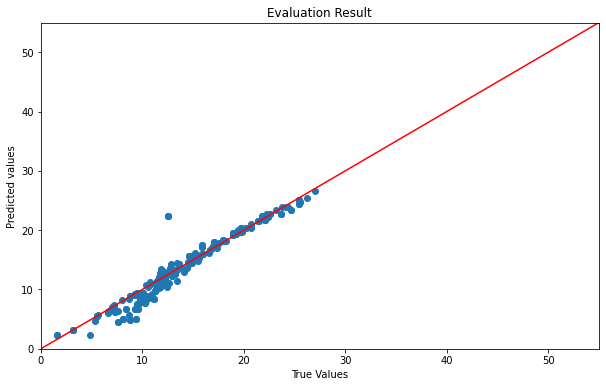

In [79]:
# visualize the prediction uisng diagonal line
y = test_predictions #y-axis
x = y_test #x-axis
fig, ax = plt.subplots(figsize=(10,6)) # create figure
ax.scatter(x,y) #scatter plots for x,y
ax.set(xlim=(0,55), ylim=(0, 55)) #set limit
ax.plot(ax.get_xlim(), ax.get_ylim(), color ='red') # draw 45 degree diagonal in figure
plt.xlabel('True Values')
plt.ylabel('Predicted values')
plt.title('Evaluation Result')
plt.show()

In [ ]:
## EVALUATE



NOTHING PAST HERE

## Creating and Training the Model

## Model Evaluation

Let's evaluate the model by checking out it's coefficients and how you can interpret them.

**Residual Histogram**

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because you want to minimize them.

In [80]:
# Importing metrics from sklearn
from sklearn import metrics

In [82]:
# Show the values of MAE, MSE, RMSE
print('MAE:', metrics.mean_absolute_error(y_test, test_predictions))
print('MSE:', metrics.mean_squared_error(y_test, test_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, test_predictions)))

MAE: 0.9615543619791665
MSE: 2.723070308722161
RMSE: 1.6501728117752277
